<a href="https://colab.research.google.com/github/mdnawabali/Cadiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Titile : Cardiovascular Risk Prediction: To predict whether the patient has a 10 year risk of future coronary heart disease(CHD)**

# **Business Context**
###The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.###

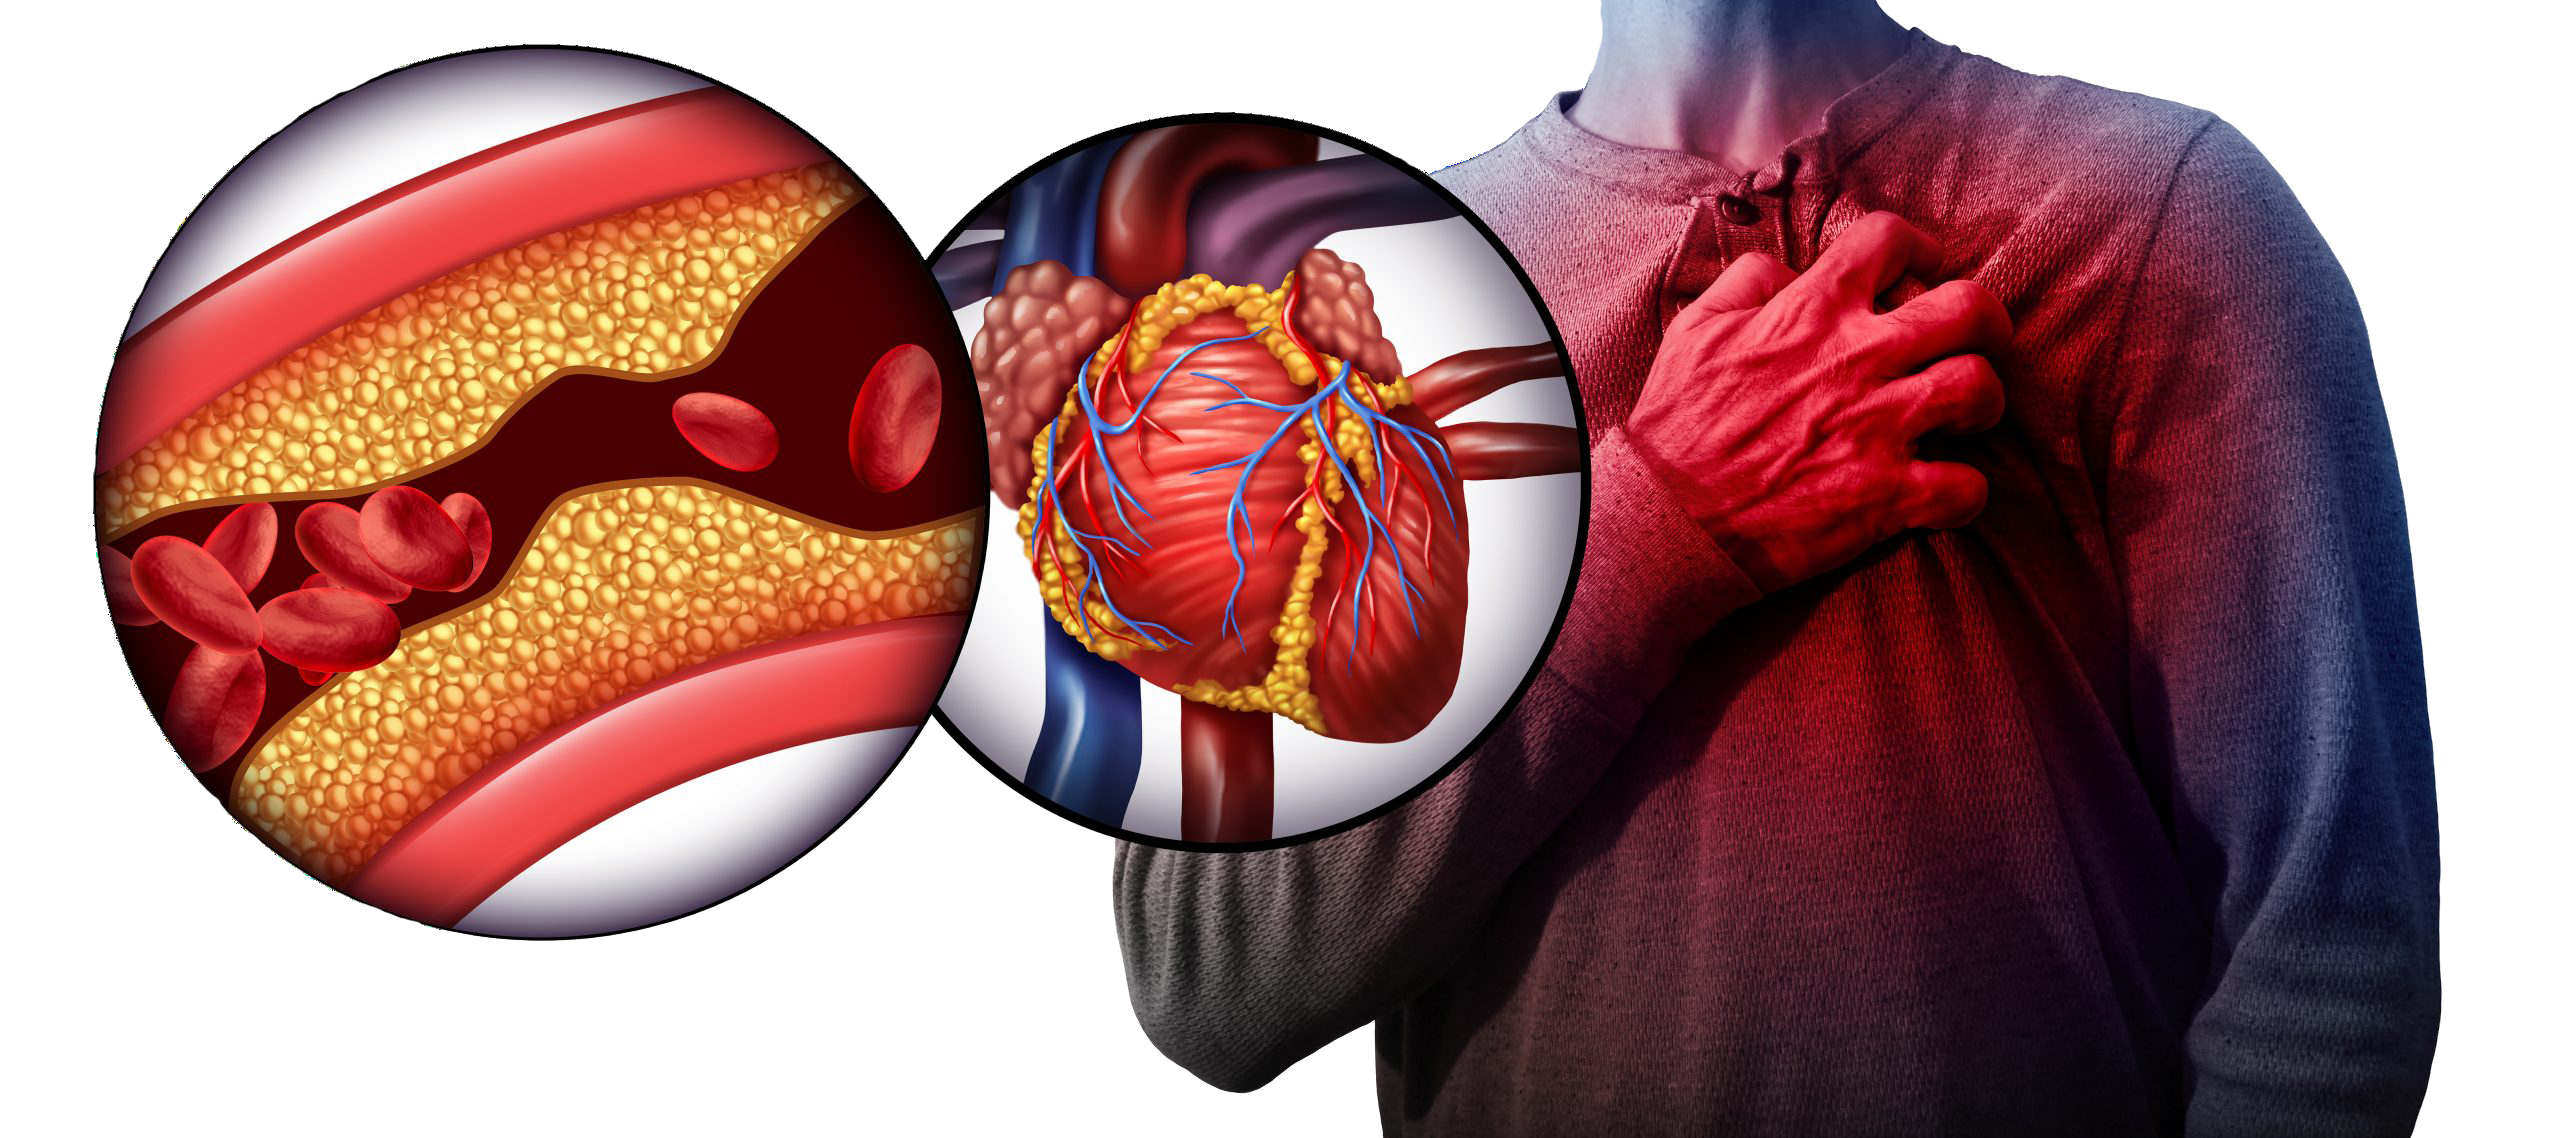

# **STEP 1 - Data Preparation**

## **Importing and Inspecting Dataset**

In [84]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [85]:
#Importing  the dataset to create a Dataframe
cv_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project 3/data_cardiovascular_risk.csv")

In [86]:
#Checking the shape of the data frame
cv_df.shape

(3390, 17)

In [87]:
#Checking the top 5 Record in the dataframe
cv_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [88]:
#Checking all the columns in the dataframe
cv_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Age|Age of the patient||totChol|Cholestrol measure|
|Education|||sysBP|systolic blood pressure|
|Sex|male or female("M" or "F")||diaBP|diastolic blood pressure|
|is_Smoking|Whether smoking currently or not||BMI|Body Mass Index|
|cigsPerDay|Cigarettes smoked per day||heartRate|Heart Rate Measure|
|BPMeds|whether or not the patient was on blood pressure medication||glucose|Level of glucose in th body|
|prevalentStroke|whether or not the patient had previously had a stroke||prevalentHyp| whether or not the patient was hypertensive |
|diabetes|Patient has Diabetes or not||TenYearCHD|10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”|






In [89]:
# Defining function to determine null values in dataset and datatype of the data
def brief():
  values=pd.DataFrame(index=cv_df.columns)
  values['Null Count']= cv_df.isnull().sum()
  values['Dtype']=cv_df.dtypes
  values['unique_count']= cv_df.nunique()
  return values 

In [90]:
#Calling the function brief()
brief()

,Null Count,Dtype,unique_count
id,0,int64,3390
age,0,int64,39
education,87,float64,4
sex,0,object,2
is_smoking,0,object,2
cigsPerDay,22,float64,32
BPMeds,44,float64,2
prevalentStroke,0,int64,2
prevalentHyp,0,int64,2
diabetes,0,int64,2


In [91]:
#Checking for duplicate values
cv_df[cv_df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [92]:
#Calling the describe function to get the summary of the dataframe
cv_df.describe().round(2).style.background_gradient().set_properties(**{'border': '1.3px solid red',
                          'color': 'black'})

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.000000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.540000,1.970000,9.070000,0.030000,0.010000,0.320000,0.030000,237.070000,132.600000,82.880000,25.790000,75.980000,82.090000,0.150000
std,978.750000,8.590000,1.020000,11.880000,0.170000,0.080000,0.460000,0.160000,45.250000,22.290000,12.020000,4.120000,11.970000,24.240000,0.360000
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## **Handling the missing values**



> **Glucose, cigsPerDay,  totChol, BMI, heartRate**- In the following column mean and median are nearby. So i am using median values for filling the missing values.



In [93]:
# # Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  cv_df[col] = cv_df[col].fillna(cv_df[col].median())


> **Education and BPMeds** feature is not a continues variable so will use Mode for filling the missing values.

In [94]:
 for col in ['education','BPMeds']:
  cv_df[col] = cv_df[col].fillna(cv_df[col].mode())

In [95]:
#Calling the function again to check for nnull values
brief()

,Null Count,Dtype,unique_count
id,0,int64,3390
age,0,int64,39
education,0,float64,4
sex,0,object,2
is_smoking,0,object,2
cigsPerDay,0,float64,32
BPMeds,0,float64,2
prevalentStroke,0,int64,2
prevalentHyp,0,int64,2
diabetes,0,int64,2
